# Programming 2
## Luis Martinez
## Triathlone Data Analysis

Often referred to as **sabremetrics**, analysis of sports data has become a huge application domain for data science. Anaysing sports data allows teams organise themselves better, athletes better understand what drives their performance, and fans get closer to the game. In this assignment we will anayse data from the 2017 Triathlone Sprint Triathlon event [Triathlone](http://www.triathlone.com/) to understand what drives triathlon success. A triathlon is a multi-sport event in which atheletes complete a **swim**, a **cycle** and a **run** in the fastest time possible. Between the swim and cycle and cycle and run there are timed **transitions** during which competitors change equipment.
<img src = "files/triathlone.jpg" width = "500">

We will follow the data science pipeline discussed in class and shown in the image below (adopted from [Hadley Wickham](http://r4ds.had.co.nz/intro.html)).
<img src = "files/DataScienceProcess.png" width = "500">

In [1]:
# Import useful packages for data science
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
# Add more packages here

## Question 1: Import 

Load the dataset stored in the file **TriathloneData.csv**. The variables in this dataset are as follows:

* **Place:** The place in which the athlete finished the race (missing for non-finishers)
* **Number:** The athlete's race bib number
* **Wave:** The wave with which the athlete started (one of 1, 2, or 3)
* **Age_Cat:** The athlete's age category (one of 16-19, 20-29, 30-39, 40-49, or 50+)
* **Gender:** The gender that the athlete declared (one of 'M' or 'F')
* **TI_Number:** Some athlete's are members of the Traithlon Ireland association and if so declare their membership number	
* **Swim:** The time taken for the swimming leg of the event (in format hh:mm:ss)
* **T1:** The time taken for the first transition of the event (in format hh:mm:ss)
* **Cycle:** The time taken for the cycling leg of the event (in format hh:mm:ss)
* **T2:** The time taken for the swimming leg of the event (in format hh:mm:ss)
* **Run:** The time taken for the running leg of the event (in format hh:mm:ss)
* **Finish:** The time taken for the total event (in format hh:mm:ss)

In [2]:
Triathlone = pd.read_csv("TriathloneData.csv")
Triathlone.head()

,Place,Number,Wave,Age_Cat,Gender,TI_Number,Swim,T1,Cycle,T2,Run,Finish
0,11.0,46,1,16-19,M,10052793,00:08:38,00:01:04,00:38:13,00:00:42,00:24:06,01:12:44
1,8.0,151,1,40-49,M,10046427,00:14:37,00:01:21,00:35:14,00:00:59,00:19:52,01:12:03
2,3.0,110,1,30-39,M,NaN,00:10:21,00:01:25,00:33:02,00:00:53,00:21:22,01:07:03
3,2.0,103,1,30-39,M,10045063,00:10:16,00:01:27,00:33:36,00:00:58,00:20:25,01:06:42
4,4.0,155,1,40-49,M,10042375,00:10:21,00:01:29,00:33:25,00:00:53,00:24:34,01:10:43


Load the dataset stored in the file **provinces.csv**. The variables in this dataset are as follows:

* **Number:** The athlete's race bib number
* **Province:** The Irish province in which the athlete lives

In [3]:
provinces = pd.read_csv("provinces.csv")
provinces.head()

,Number,Province
0,46,Leinster
1,53,Connacht
2,57,Leinster
3,61,Leinster
4,64,Leinster


## Question 2: Tidy 

Convert the string times into seconds. For example, the Swim time for the first athlete "00:08:38" should convert to 518 seconds.

Define a function to convert times into seconds.

In [4]:
def hms_to_seconds(t):
    if(type(t) != str):
        return np.NaN
    else:
        h, m, s = [int(i) for i in t.split(':')]
        return 3600*h + 60*m + s

Convert times into seconds for each portion of the race. The pandas Series **apply** function used togehter with the **hms_to_seconds** function defined above can be used for this.

In [5]:
# I use the apply function to convert times into seconds
# I use the pandas Series apply function used togehter with the hms_to_seconds function to convert times into seconds 
# for each portion of the race

Triathlone["Swim"] = Triathlone["Swim"].apply(hms_to_seconds)
Triathlone["T1"] = Triathlone["T1"].apply(hms_to_seconds)
Triathlone["Cycle"] = Triathlone["Cycle"].apply(hms_to_seconds)
Triathlone["T2"] = Triathlone["T2"].apply(hms_to_seconds)
Triathlone["Run"] = Triathlone["Run"].apply(hms_to_seconds)
Triathlone["Finish"] = Triathlone["Finish"].apply(hms_to_seconds)

In [6]:
# I check if the new Triatlone is all right
Triathlone.head()

,Place,Number,Wave,Age_Cat,Gender,TI_Number,Swim,T1,Cycle,T2,Run,Finish
0,11.0,46,1,16-19,M,10052793,518,64.0,2293.0,42.0,1446.0,4364.0
1,8.0,151,1,40-49,M,10046427,877,81.0,2114.0,59.0,1192.0,4323.0
2,3.0,110,1,30-39,M,NaN,621,85.0,1982.0,53.0,1282.0,4023.0
3,2.0,103,1,30-39,M,10045063,616,87.0,2016.0,58.0,1225.0,4002.0
4,4.0,155,1,40-49,M,10042375,621,89.0,2005.0,53.0,1474.0,4243.0


## Question 2: Model 

Perform a simple analysis of the dataset to answer the questions listed below.

**a)** What is the average finish time?

In [7]:
# I use the mean() function to calculate the average finish

avrfinish = Triathlone["Finish"].mean()
print("the average finish time is:",avrfinish, "seconds")

the average finish time is: 5350.733695652174 seconds


**b)** What is minimum, mean and maximum cycling times?

In [8]:
# I use these three functions:

minimum = Triathlone["Cycle"].min()
mean = Triathlone["Cycle"].mean()
maximum = Triathlone["Cycle"].max()
print("the minimum, mean and maximum cycling times are:", minimum,"seconds,", mean, "seconds and", maximum,"seconds")

the minimum, mean and maximum cycling times are: 1867.0 seconds, 2628.5661375661375 seconds and 4285.0 seconds


**c)** On average which component takes the longest: swimming, cycling or running?

In [9]:
# I calculate the average of each of these components of the Triathlone

meanswimming = Triathlone["Swim"].mean()
meancycling = Triathlone["Cycle"].mean()
meanrunning = Triathlone["Run"].mean()

# Then I calculate which takes the longest

if (meanswimming > meancycling and meanswimming > meanrunning):
    print(" swimming takes the longest")
if (meancycling > meanswimming and meancycling > meanrunning):
    print(" cycling takes the longest")
if (meanrunning > meanswimming and meanrunning > meancycling):
    print(" running takes the longest")


 cycling takes the longest


**d)** Did more men or women take part in the event?

In [10]:
# I use value_counts() function to calculate how many of each one there is and who are more

sex = Triathlone["Gender"].value_counts()
print(sex)
num = sex.max()
print("Men have taken more part in the event with:", num, sex.keys()[0])

M    138
F     52
Name: Gender, dtype: int64
Men have taken more part in the event with: 138 M


In [11]:
#example for exam(study)
lolo = Triathlone["Age_Cat"].value_counts()
lolo

30-39    78
40-49    55
20-29    34
50+      22
16-19     1
Name: Age_Cat, dtype: int64

In [12]:
polla = Triathlone.groupby(["Gender"])
print(polla)

**e)** What is the difference between the average event finish time for males and for females?

In [13]:
# first I create a new date set with the 2 components i am interested in

comparison = Triathlone[["Gender", "Finish"]]

# I calculate the average times for female
female = comparison[comparison["Gender"]=='F']
meanfemale = female.mean()

# I calcualte the average times for male
male = comparison[comparison["Gender"]=='M']
meanmale = male.mean()

# I calculate the difference
diference = meanfemale - meanmale
print(diference)
print("\n")
print("the difference between the average event finish time for males:(", meanmale, "seconds)and for females:(", meanfemale,") is:", diference, "seconds.")

Finish    412.951323
dtype: float64


the difference between the average event finish time for males:( Finish    5240.762963
dtype: float64 seconds)and for females:( Finish    5653.714286
dtype: float64 ) is: Finish    412.951323
dtype: float64 seconds.


## Question 3: Visualise 

Generate some visualisations from the dataset.

**a)** Plot a histogram of finishing times.

Text(0.5, 0, 'Duration (seconds)')

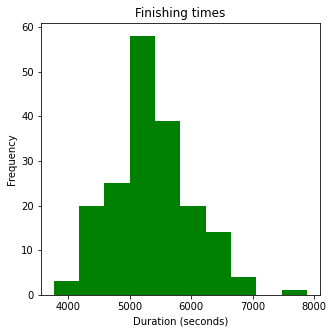

In [14]:
finishingtimes = Triathlone["Finish"]
finishingtimes.plot(kind = "hist", figsize = (5,5), color="g", title="Finishing times")
plt.xlabel("Duration (seconds)")

**b)** Draw an appropriate visualisation to compare the finishing times of different genders.

Text(0, 0.5, 'Time in Seconds')

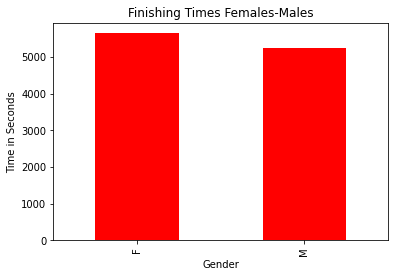

In [15]:
finish_diff_genders = Triathlone.groupby(["Gender"])
pillar = finish_diff_genders["Finish"].mean()
pillar.plot(kind = "bar", color="r", title="Finishing Times Females-Males")
label=pillar.plot(kind = "bar", color="r", title="Finishing Times Females-Males")
label.set_ylabel("Time in Seconds")

**c)** Draw an appropriate visualisation to compare the finishing times of difference age groups.

In [16]:
# I chechk all different groups of ages
Triathlone["Age_Cat"].value_counts()


30-39    78
40-49    55
20-29    34
50+      22
16-19     1
Name: Age_Cat, dtype: int64

Text(0, 0.5, 'Time in Seconds')

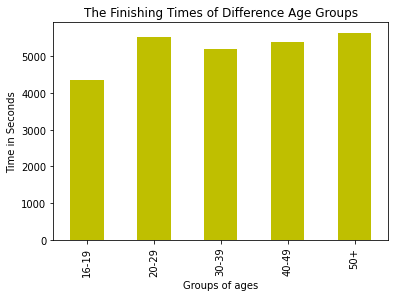

In [17]:
# I use the groupby() function to put together by ages
# then I calculate the means of each group
fin_diff_age = Triathlone.groupby(["Age_Cat"])
means = fin_diff_age["Finish"].mean()
means.plot(kind = "bar",color="y", title="The Finishing Times of Difference Age Groups")
label = means.plot(kind = "bar",color="y", title="The Finishing Times of Difference Age Groups")

label.set_xlabel("Groups of ages")
label.set_ylabel("Time in Seconds")

**d)** Draw an appropriate visualisation to determine whether or not Transition 2 times correlate with Finish times.

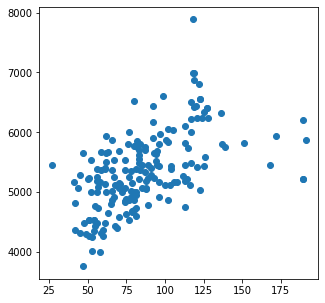

In [18]:
# I use a scatter plot to visualize the correlation between thes two components
plt.figure(figsize=(5, 5))

plt.scatter(Triathlone["T2"], Triathlone["Finish"])

**e)** Draw a scatter plot matrix to explore the realtionships between the times taken by each athlete for each different component of the triathlon.

In [22]:
import pandas.plotting

array([[<AxesSubplot:xlabel='Swim', ylabel='Swim'>,
        <AxesSubplot:xlabel='T1', ylabel='Swim'>,
        <AxesSubplot:xlabel='Cycle', ylabel='Swim'>,
        <AxesSubplot:xlabel='T2', ylabel='Swim'>,
        <AxesSubplot:xlabel='Run', ylabel='Swim'>,
        <AxesSubplot:xlabel='Finish', ylabel='Swim'>],
       [<AxesSubplot:xlabel='Swim', ylabel='T1'>,
        <AxesSubplot:xlabel='T1', ylabel='T1'>,
        <AxesSubplot:xlabel='Cycle', ylabel='T1'>,
        <AxesSubplot:xlabel='T2', ylabel='T1'>,
        <AxesSubplot:xlabel='Run', ylabel='T1'>,
        <AxesSubplot:xlabel='Finish', ylabel='T1'>],
       [<AxesSubplot:xlabel='Swim', ylabel='Cycle'>,
        <AxesSubplot:xlabel='T1', ylabel='Cycle'>,
        <AxesSubplot:xlabel='Cycle', ylabel='Cycle'>,
        <AxesSubplot:xlabel='T2', ylabel='Cycle'>,
        <AxesSubplot:xlabel='Run', ylabel='Cycle'>,
        <AxesSubplot:xlabel='Finish', ylabel='Cycle'>],
       [<AxesSubplot:xlabel='Swim', ylabel='T2'>,
        <AxesSubplot:xl

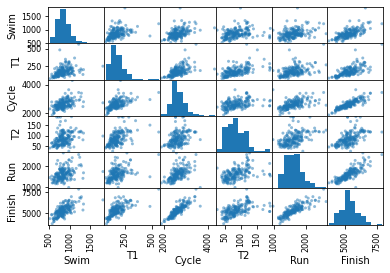

In [24]:
from pandas.plotting import scatter_matrix
times = Triathlone[["Swim", "T1", "Cycle", "T2", "Run", "Finish"]]

scatter_matrix(times, diagonal = "hist")

**f)** Draw a visualsiation to show the number of athletes who took part from each province.

<AxesSubplot:ylabel='Province'>

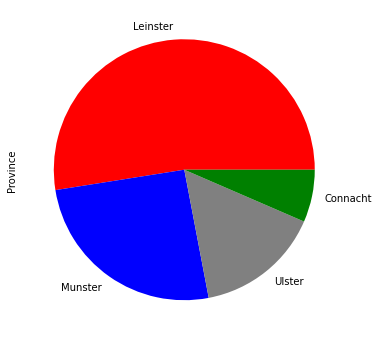

In [20]:
atl_provincie = pd.merge(Triathlone, provinces, on="Number", how = 'outer')
atl_provincie.head()
order = atl_provincie["Province"].value_counts()
order
order.plot(kind="pie", figsize=(6, 6), colors=["red","blue","grey","green"])



## Question 4: Transform 

Ask deeper questions which require merging the two datasets.

**a)** Which province has the fastest finishers on average?

In [25]:
# first I fix the missed values in the component of finish
# then I merge the Triathlone and provinces datasets
mean_Finish = Triathlone["Finish"].mean()
Triathlone["Finish"] = Triathlone["Finish"].fillna(mean_Finish)
atl_provincie = pd.merge(Triathlone, provinces, on="Number", how = 'outer')
atl_provincie.head()


,Place,Number,Wave,Age_Cat,Gender,TI_Number,Swim,T1,Cycle,T2,Run,Finish,Province
0,11.0,46,1.0,16-19,M,10052793,518.0,64.0,2293.0,42.0,1446.0,4364.0,Leinster
1,8.0,151,1.0,40-49,M,10046427,877.0,81.0,2114.0,59.0,1192.0,4323.0,Leinster
2,3.0,110,1.0,30-39,M,NaN,621.0,85.0,1982.0,53.0,1282.0,4023.0,Munster
3,2.0,103,1.0,30-39,M,10045063,616.0,87.0,2016.0,58.0,1225.0,4002.0,Ulster
4,4.0,155,1.0,40-49,M,10042375,621.0,89.0,2005.0,53.0,1474.0,4243.0,Munster


In [26]:
# I calculete the mean of each province finish

Leinster = atl_provincie[atl_provincie["Province"]=='Leinster']
Leinsterfinish = Leinster["Finish"].mean()

Munster = atl_provincie[atl_provincie["Province"]=='Munster']
Munsterfinish = Munster["Finish"].mean()

Ulster = atl_provincie[atl_provincie["Province"]=='Ulster']
Ulsterfinish = Ulster["Finish"].mean()

Connacht = atl_provincie[atl_provincie["Province"]=='Connacht']
Connachtfinish = Connacht["Finish"].mean()

# I show values in a list 
finishlist = [Leinsterfinish,Munsterfinish, Ulsterfinish, Connachtfinish]
print(finishlist)

# I calculate which is the province with the fastest finishers on average 
if (Leinsterfinish < Munsterfinish and  Leinsterfinish < Ulsterfinish  and Leinsterfinish < Connachtfinish):
    print("Leinster has the fastest finishers on average with:",Leinsterfinish, "seconds" )
if (Munsterfinish < Leinsterfinish and  Munsterfinish < Ulsterfinish  and Munsterfinish < Connachtfinish):
    print("Munster has the fastest finishers on average with:",Munsterfinish ,"seconds")
if (Ulsterfinish < Leinsterfinish and  Ulsterfinish < Munsterfinish  and Ulsterfinish < Connachtfinish):
    print("Ulster has the fastest finishers on average with:",Ulsterfinish ,"seconds")
if (Connachtfinish < Leinsterfinish and  Connachtfinish < Munsterfinish and Connachtfinish < Ulsterfinish):
    print("Connacht has the fastest finishers on average with:",Connachtfinish ,"seconds")


[5408.5120108695655, 5233.775901942646, 5260.7149550224885, 5342.0]
Munster has the fastest finishers on average with: 5233.775901942646 seconds
